# Neural Dataset

> Neural dataset for character, sentence and synthetic dataset

In [ ]:
# | default_exp dataset

In [ ]:
# | hide
from nbdev.showdoc import *

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

In [ ]:
#| export
import re
from typing import Optional, List, Tuple, Set

import torch
from torch.utils.data import Dataset
from torchtyping import TensorType

from neuraltext.utils import mat2dict

### The Dataset

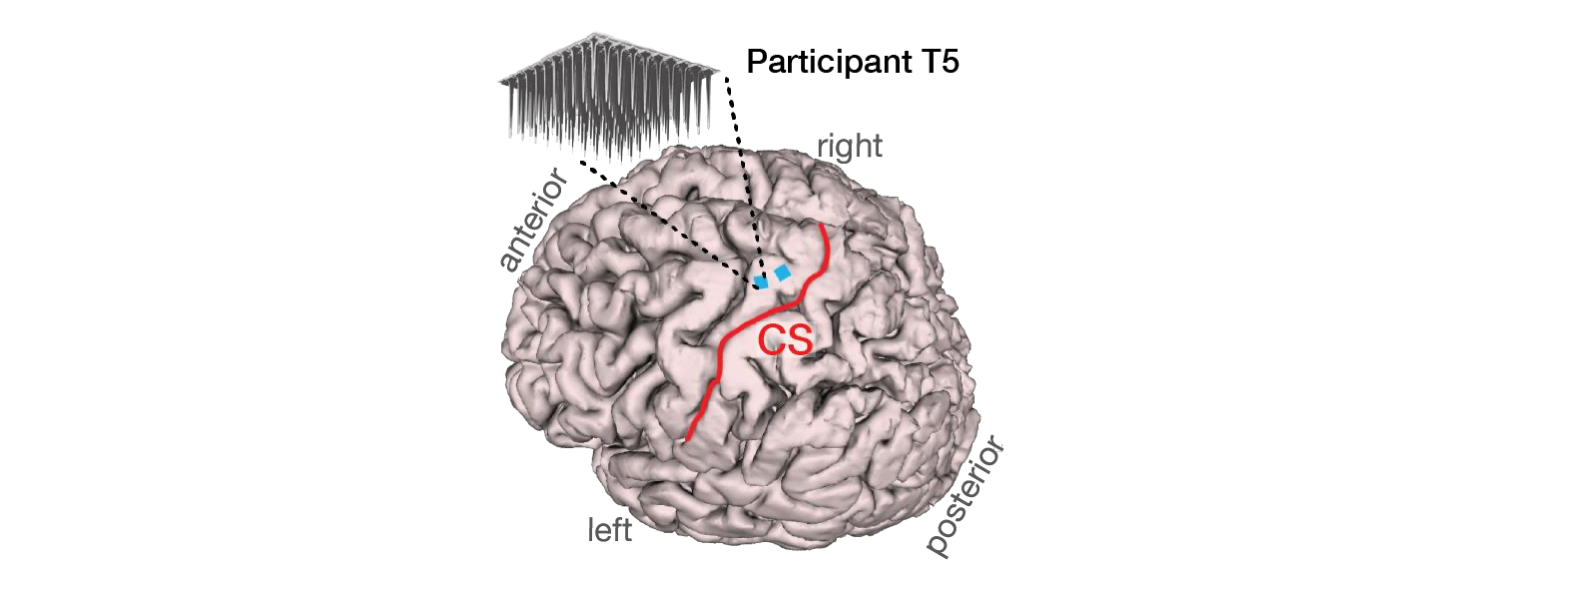

In [ ]:
#| export
class NeuralCharacterDataset(Dataset):
    def __init__(self, data: dict):
        xs = []
        ys = []
        vocabs = set()
        for letter, items in data.items():
            vocabs.add(letter)
            
            for item in items:
                xs.append(letter)
                ys.append(torch.tensor(item))
        
        self.xs: List[str] = xs
        self.ys = ys
        self.vocabs: Set[str] = vocabs
    
    def label2num(self, label: str) -> int:
        return list(self.vocabs).index(label)
    
    def num2label(self, num: int) -> str:
        return list(self.vocabs)[num]
    
    def __len__(self) -> int:
        return len(self.ys)

    def __getitem__(self, index) -> Tuple[int, TensorType['n_step', 'n_channel']]:
        return self.label2num(self.xs[index]), self.ys[index]

In [ ]:
#| export
class NeuralSentenceDataset(Dataset):
    def __init__(self):
        pass